# Machine Learning Assignment


## Loading the dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from scipy.stats import randint as sp_randint
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from time import time

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz


df = pd.read_csv('data/breast-cancer.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         568 non-null    float64
 1   Radius (Mean)              550 non-null    float64
 2   Texture (Mean)             568 non-null    float64
 3   Perimeter (Mean)           567 non-null    float64
 4   Area (Mean)                566 non-null    float64
 5   Smoothness (Mean)          567 non-null    float64
 6   Compactness (Mean)         566 non-null    float64
 7   Concavity (Mean)           569 non-null    float64
 8   Concave Points (Mean)      569 non-null    float64
 9   Symmetry (Mean)            566 non-null    float64
 10  Fractal Dimension (Mean)   567 non-null    float64
 11  Radius (Error)             551 non-null    float64
 12  Texture (Error)            567 non-null    float64
 13  Perimeter (Error)          568 non-null    float64

,ID,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),...,Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst),Diagnosis
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890,M
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Processing the dataset

First, you need to clean the data.

In [2]:
# TODO: your own data cleaning, e.g., dealing with the missing values and converting the feature column (to numeric)

df.describe()


,ID,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
count,5.680000e+02,550.000000,568.000000,567.000000,566.000000,567.000000,566.000000,569.000000,569.000000,566.000000,...,551.000000,566.000000,567.000000,566.000000,569.000000,565.000000,567.000000,566.000000,566.000000,565.000000
mean,3.042370e+07,14.123118,19.280986,92.010459,654.704064,0.096376,0.104220,0.088799,0.048919,0.181032,...,16.275134,25.629170,107.235326,879.487986,0.132369,0.254019,0.272220,0.114233,0.289828,0.083974
std,1.251247e+08,3.528840,4.299856,24.322495,352.102951,0.014074,0.052820,0.079720,0.038803,0.027410,...,4.847944,6.115881,33.609513,569.722315,0.022832,0.157306,0.208649,0.065489,0.061686,0.018101
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691895e+05,11.702500,16.170000,75.190000,420.300000,0.086390,0.064605,0.029560,0.020310,0.161900,...,13.030000,21.065000,84.135000,515.425000,0.116600,0.147200,0.115450,0.064330,0.250250,0.071460
50%,9.060010e+05,13.375000,18.835000,86.240000,548.750000,0.095870,0.092525,0.061540,0.033500,0.179150,...,14.970000,25.370000,97.660000,685.550000,0.131300,0.211900,0.226700,0.099840,0.282050,0.080040
75%,8.825022e+06,15.772500,21.785000,104.200000,782.675000,0.105350,0.130375,0.130700,0.074000,0.195550,...,18.655000,29.497500,125.250000,1065.000000,0.146000,0.337100,0.381900,0.161300,0.317825,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Convert 

In [3]:
df['Diagnosis'] = df['Diagnosis'].replace('M', 1)
df['Diagnosis'] = df['Diagnosis'].replace('B', 0)
df.head()

,ID,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),...,Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst),Diagnosis
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890,1
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Class Distribution

In [4]:
print(df['Diagnosis'].value_counts())

0    358
1    211
Name: Diagnosis, dtype: int64


([<matplotlib.axis.XTick at 0x257c20462b0>,
 [Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')])

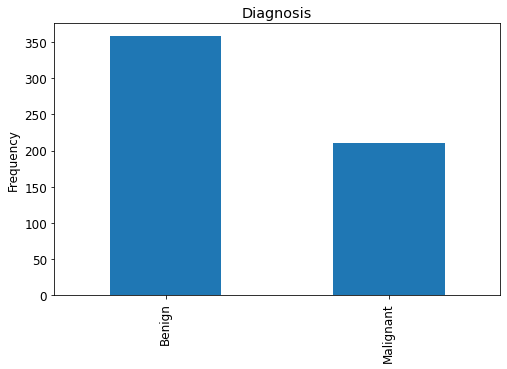

In [5]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 5)})
plt.ylabel('Frequency')
df['Diagnosis'].value_counts().plot(kind="bar", title='Diagnosis');
positions = (0, 1)
labels = ("Benign", "Malignant")
plt.xticks(positions, labels)

### Missing Values

#### Dropping ID

In [6]:
df = df.drop('ID', 1)

df = df.replace(' ', np.nan)
df = df.replace('', np.nan)

#### Number of missing values

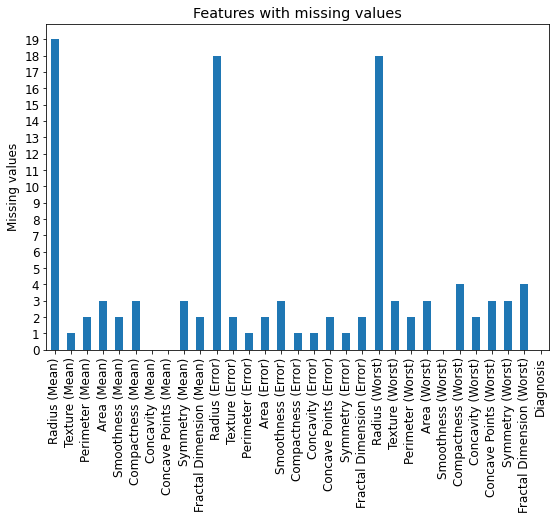

In [7]:
df_isnull = df.isnull().sum()
plt.rcParams.update({'font.size': 12, 'figure.figsize': (9, 6)})
plt.yticks(range(0, 20))
plt.ylabel('Missing values')
df_isnull.plot(kind="bar", title='Features with missing values');

In [8]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst),Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,NaN,0.4601,0.11890,1
10,NaN,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452,1
21,NaN,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,0
27,NaN,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,27.26,139.90,1403.0,0.1338,0.2117,0.34460,0.14900,0.2341,0.07421,1
44,NaN,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,...,29.89,105.50,740.7,0.1503,0.3904,0.37280,0.16070,0.3693,0.09618,1


In [9]:
null_count = (null_data.isnull()).sum(axis=1)
print(null_count)

0       1
10      3
21      3
27      3
44      3
67      3
70      1
90      3
130     3
203    18
226     3
249     1
256     3
267     3
302     3
349     3
367     1
397     3
433    19
451     3
467     1
498     1
507     3
549    19
552     3
dtype: int64


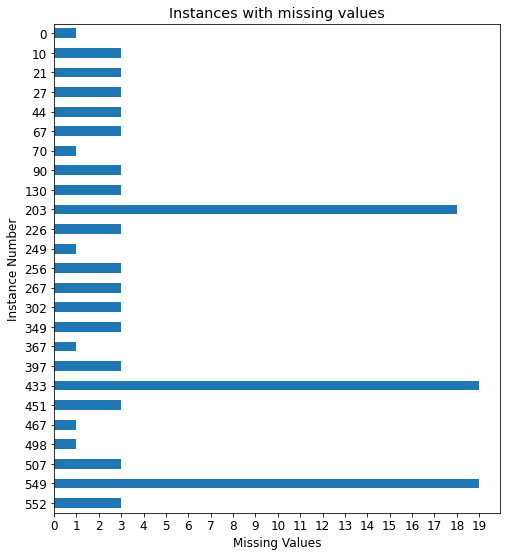

In [10]:
null_count = (null_data.isnull()).sum(axis=1)

plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 9)})
plt.xticks(range(0, 20))
plt.ylabel('Instance Number')
plt.xlabel('Missing Values')
null_count.plot(kind="barh", title='Instances with missing values');
plt.gca().invert_yaxis()

#### Zero values

In [11]:
zero_data = df[df == 0].count()
print(zero_data)

Radius (Mean)                  0
Texture (Mean)                 0
Perimeter (Mean)               0
Area (Mean)                    0
Smoothness (Mean)              0
Compactness (Mean)             0
Concavity (Mean)              13
Concave Points (Mean)         13
Symmetry (Mean)                0
Fractal Dimension (Mean)       0
Radius (Error)                 0
Texture (Error)                0
Perimeter (Error)              0
Area (Error)                   0
Smoothness (Error)             0
Compactness (Error)            0
Concavity (Error)             13
Concave Points (Error)        13
Symmetry (Error)               0
Fractal Dimension (Error)      0
Radius (Worst)                 0
Texture (Worst)                0
Perimeter (Worst)              0
Area (Worst)                   0
Smoothness (Worst)             0
Compactness (Worst)            0
Concavity (Worst)             13
Concave Points (Worst)        13
Symmetry (Worst)               0
Fractal Dimension (Worst)      0
Diagnosis 

#### Drop all missing values

In [12]:
df_dropna = df.dropna()
df_dropna.head(2)

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst),Diagnosis
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1


#### Drop instances with a large amount of missing data

In [13]:
df = df.drop([203, 433, 549])

#### Impute values with K-NN

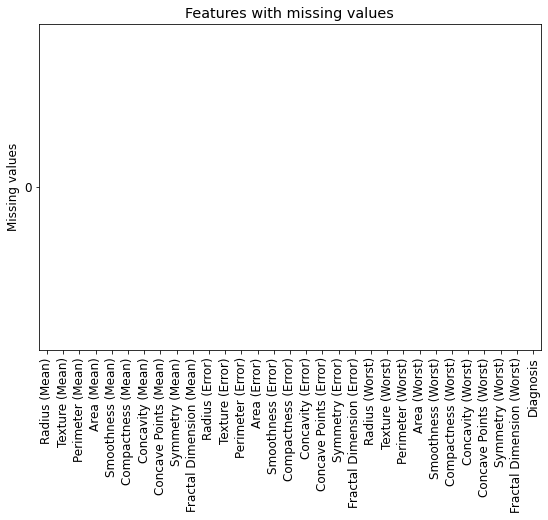

In [14]:
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

df_isnull = df_knn.isnull().sum()
plt.rcParams.update({'font.size': 12, 'figure.figsize': (9, 6)})
plt.yticks(range(0, 20))
plt.ylabel('Missing values')
df_isnull.plot(kind="bar", title='Features with missing values');

### Duplicates

In [15]:
df.duplicated().value_counts()

False    566
dtype: int64

### Noise

#### Features ordered by standard deviation.

In [16]:
df.std().sort_values(ascending=False)

Area (Worst)                 569.722315
Area (Mean)                  352.102951
Area (Error)                  45.528974
Perimeter (Worst)             33.627324
Perimeter (Mean)              24.307412
Texture (Worst)                6.115881
Radius (Worst)                 4.844686
Texture (Mean)                 4.301849
Radius (Mean)                  3.528840
Perimeter (Error)              2.025363
Texture (Error)                0.550677
Diagnosis                      0.483506
Radius (Error)                 0.277821
Concavity (Worst)              0.208773
Compactness (Worst)            0.157306
Concavity (Mean)               0.079767
Concave Points (Worst)         0.065471
Symmetry (Worst)               0.061737
Compactness (Mean)             0.052820
Concave Points (Mean)          0.038792
Concavity (Error)              0.030242
Symmetry (Mean)                0.027410
Smoothness (Worst)             0.022568
Fractal Dimension (Worst)      0.018087
Compactness (Error)            0.017940


[Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')]

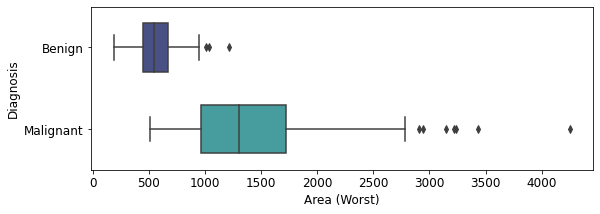

In [17]:
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.boxplot(y='Diagnosis', x='Area (Worst)', data=df, orient="h", width= 0.6, palette="mako")
ax.set_yticklabels(['Benign','Malignant'])

In [ ]:
df["Fractal Dimension (Error)"].plot.hist()

#### Removing all rows containing possible outliers

In [ ]:
df_knn_no_outliers = df_knn[(np.abs(stats.zscore(df_knn)) < 3).all(axis=1)]

fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.boxplot(y='Diagnosis', x='Area (Worst)', data=df_knn_no_outliers, orient="h", width= 0.6, palette="mako")
ax.set_yticklabels(['Benign','Malignant'])

In [ ]:
df_knn_no_outliers.info()

### Correlation Analysis

In [22]:
df_mean = df[["Radius (Mean)", 
              "Texture (Mean)", 
              "Perimeter (Mean)", 
              "Area (Mean)", 
              "Smoothness (Mean)", 
              "Compactness (Mean)", 
              "Concavity (Mean)",
             "Concave Points (Mean)",
             "Symmetry (Mean)",
             "Fractal Dimension (Mean)",
             "Diagnosis"]]

df_error = df[["Radius (Error)", 
              "Texture (Error)", 
              "Perimeter (Error)", 
              "Area (Error)", 
              "Smoothness (Error)", 
              "Compactness (Error)", 
              "Concavity (Error)",
             "Concave Points (Error)",
             "Symmetry (Error)",
             "Fractal Dimension (Error)",
              "Diagnosis"]]

df_worst = df[["Radius (Worst)", 
              "Texture (Worst)", 
              "Perimeter (Worst)", 
              "Area (Worst)", 
              "Smoothness (Worst)", 
              "Compactness (Worst)", 
              "Concavity (Worst)",
             "Concave Points (Worst)",
             "Symmetry (Worst)",
             "Fractal Dimension (Worst)",
              "Diagnosis"]]

df_size = df[["Radius (Mean)",
             "Perimeter (Mean)",
             "Area (Mean)",
             "Diagnosis"]]

#### Mean

In [1]:
#import heatmap
corr = df_mean.corr(method='spearman')

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='sns.diverging_palette(20, 220, n=200)',
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
plt.title("Mean Features Correlation Matrix")
ax


NameError: name 'df_mean' is not defined

In [ ]:
sns.pairplot(data=df_mean, hue="Diagnosis")

#### Error

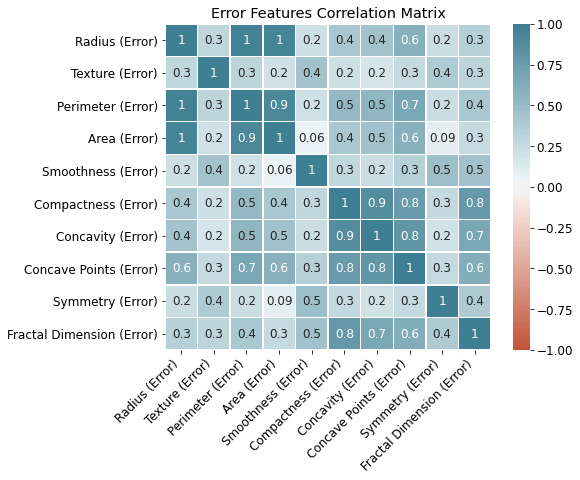

In [24]:
#import heatmap
corr = df_error.corr(method='spearman')

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
plt.title("Error Features Correlation Matrix")
ax

#### Worst

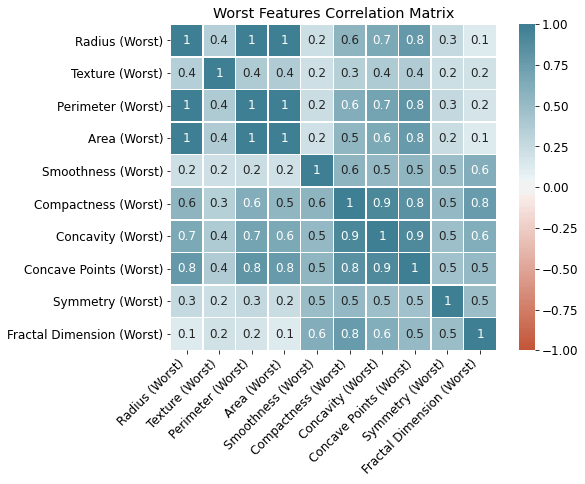

In [25]:

#import heatmap
corr = df_worst.corr(method='spearman')

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
plt.title("Worst Features Correlation Matrix")
ax

#### All

In [ ]:
corr = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
ax

## Recursive Feature Elimination

In [ ]:

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df_dropna.iloc[:,:len(df_dropna.columns)-1]
y = df_dropna.iloc[:,len(df_dropna.columns)-1]

# Transform class labels to numeric labels
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Instantiating classifier (with default hyper-parameter values)
model = DecisionTreeClassifier()

# Instantiating (setting up) RFE
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

start_time = time()
rfecv.fit(X, y)
end_time = time()

# Printing out the results
print("RFECV took %.2f seconds to identify %d features" % 
      ((end_time - start_time), rfecv.n_features_))
print(rfecv.ranking_)

In [ ]:
# Creating a DataFrame to display the original columns and their ranking
feature_ranking_df = pd.DataFrame()
feature_ranking_df['feature'] = X.columns
feature_ranking_df['rank'] = rfecv.ranking_

feature_ranking_df = feature_ranking_df.sort_values(by='rank', ascending=True)
feature_ranking_df.head(10)

In [ ]:
print(df_dropna[:,:len(df_dropna.columns)-1])

## Hyper-parameter tuning

In [ ]:
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

### Random Search

In [ ]:
# instantiating the model
model = KNeighborsClassifier()

# specify parameters and distributions to sample from
param_dict = {"n_neighbours": [1, 5],
              "n_trees": [1, 100],
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"]}


# run random search
print("> STARTING RANDOM SEARCH ...")
n_iter_search = 20
n_folds = 10

random_search = RandomizedSearchCV(model, param_distributions=param_dict,
                                   n_iter=n_iter_search, cv=n_folds)

start_time = time()
random_search.fit(X, y)
end_time = time()


print("> RANDOM SEARCH COMPLETE")

print("\nRandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((end_time - start_time), n_iter_search))
report(random_search.cv_results_)

### Grid Search

#### Random Forest

In [ ]:
# instantiating the model
model = my_classifier.MyClassifier()

# defining parameter grid
param_grid = {"max_depth": [2, 4, 6, 8, None],
              "n_trees": [50, 100],
              "min_samples_split": [2, 4, 6, 8, 10],
              "criterion": ["gini", "entropy"]}

# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X, y)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

#### Decision Tree

In [ ]:
model = DecisionTreeClassifier()

# defining parameter grid
param_grid = {"max_depth": [2, 4, 6, 8, None],
              "min_samples_split": [2, 4, 6, 8, 10],
              "criterion": ["gini", "entropy"]}

# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X, y)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

#### KNN

In [ ]:
# instantiating the model
model = KNeighborsClassifier()

# defining parameter grid
param_grid = {"n_neighbors": [3, 5, 10, 8],
              "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}

# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X, y)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

##  Feature Selection

In [ ]:
df_knn_rfe = df_knn[["Concave Points (Worst)",
                     "Texture (Worst)",
                     "Radius (Worst)",
                     "Smoothness (Worst)",
                     "Area (Worst)",
                     "Area (Error)",
                     "Concave Points (Mean)",
                     "Compactness (Worst)",
                     "Concavity (Worst)",
                     "Smoothness (Error)",
                     "Diagnosis"]]

In [ ]:
df_knn_wolberg = df_knn[["Texture (Mean)",
                         "Area (Worst)",
                         "Smoothness (Worst)",
                         "Diagnosis"]]

### Preparing the X and y arrays in preparation for running the machine learning classifier below

In [26]:
df['Diagnosis'] = df['Diagnosis'].replace('M', 1)
df['Diagnosis'] = df['Diagnosis'].replace('B', 0)

df = df.drop('ID', 1)
df = df.replace(' ', np.nan)
df = df.replace('', np.nan)

df = df.drop([203, 433, 549])
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [27]:
#The dataset
df_test = df_knn

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df_test.iloc[:,:len(df_test.columns)-1]
y = df_test.iloc[:,len(df_test.columns)-1]

# Transform class labels to numeric labels
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

## Running Machine Learning classifier

You should replace some code indicated below to import, load and run your own classifier.

Literally just two lines where you need to update the code. Otherwise, this should be able to run your classifier, to demonstrate that it is working and running properly against the dataset provided.

### Hold-out validation

In [ ]:
# NOTE THAT THIS IS JUST AN EXAMPLE WITH THE RANDOM CLASSIFIER
# THIS SHOULD BE REPLACED WITH RUNNING YOUR OWN CLASSIFIER (FROM A PYTHON FILE)
# PS: you need to restart the notebook to load changes to python files used (like the random_classifier here)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from classifier import my_classifier     # REPLACE WITH IMPORT FOR YOUR CLASSIFIER

# arrays for storing performance metrics
accuracy_list = np.array([])
precision_list = np.array([])
recall_list = np.array([])
fscore_list = np.array([])

# sets the number of runs of hold-out validation below (from which we get statistics)
n = 100

print("Training...")
for x in range(n):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
    # Creating the model, training and testing it
    model = my_classifier.MyClassifier(n_estimators = 100, random_state=1, criterion='entropy', min_samples_split=4, max_depth=None) # REPLACE WITH YOUR CLASSIFIER
    model = model.fit(X_train, y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Appending performance metrics to arrays created above
    accuracy_list = np.append(accuracy_list, metrics.accuracy_score(y_test, y_pred))
    precision_list = np.append(precision_list, metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_list = np.append(recall_list, metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))
    fscore_list = np.append(fscore_list, metrics.f1_score(y_test, y_pred, average='macro', zero_division=0))




# printing out the performance metrics (mean + standard deviation)
print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list.mean(), accuracy_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision_list.mean(), precision_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (recall_list.mean(), recall_list.std() * 2))
print("F-score:    %0.2f (+/- %0.2f)" % (fscore_list.mean(), fscore_list.std() * 2))
print(metrics.confusion_matrix(y_test, y_pred))

# plotting a histogram of the performance metrics
plt.figure()
plt.hist(accuracy_list, bins=50, alpha=0.5, label='accuracy')
plt.hist(precision_list, bins=50, alpha=0.5, label='precision')
plt.hist(recall_list, bins=50, alpha=0.5, label='recall')
plt.hist(fscore_list, bins=50, alpha=0.5, label='fscore')
plt.legend(loc='upper right')
plt.xlabel('Performance (metric value)')
plt.ylabel('Frequency')
plt.show()

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from classifier import my_classifier

# Instantiating model
model = my_classifier.MyClassifier(n_estimators = 100, random_state=1, criterion='entropy', min_samples_split=4, max_depth=None)
#model = DecisionTreeClassifier(random_state=1, criterion='entropy', min_samples_split=4, max_depth=None)
#model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

#Scores
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

start_time = time()
# 10-fold cross validation
scores = cross_validate(model, X, y, cv=10, scoring=scoring)
end_time = time()

print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision (Testing):  %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
print("Recall (Testing):  %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))
print("F1-Score (Testing):  %0.2f (+/- %0.2f)" % (scores['test_f1_score'].mean(), scores['test_f1_score'].std() * 2))
#print(scores['train_accuracy'])
y_train_pred = cross_val_predict(model, X, y, cv=10)
print("Time taken: %0.2f" % (end_time - start_time))
confusion_matrix(y, y_train_pred, labels=[1, 0])


Accuracy (Testing):  0.96 (+/- 0.05)
Precision (Testing):  0.95 (+/- 0.10)
Recall (Testing):  0.95 (+/- 0.08)
F1-Score (Testing):  0.95 (+/- 0.07)
Time taken: 6.42


array([[198,  12],
       [ 10, 346]], dtype=int64)

In [29]:
# Visualising the Decision Tree
import pydot
from sklearn import tree

def visualise_tree(model, feature_list, class_labels):
    
    # Get feature names and class labels
    X_df = df_test.iloc[:,:len(df_test.columns)-1]
    feature_names = list(X_df.columns.values.tolist())
    class_labels = df_test['Diagnosis'].unique()
    
    # Plot tree graph
    dot_data = tree.export_graphviz(model, out_file=None, rotate=True
       , feature_names=feature_names, class_names=['0', '1'] 
       , filled = True)
    pdot = pydot.graph_from_dot_data(dot_data)
    pdot[0].set_graph_defaults(size= "\"7,7\"")
    graph= Source(pdot[0].to_string())
    graph_svg = SVG(graph.pipe(format='svg'))
    display(graph_svg)

Accuracy: 0.94 (+/- 0.08)


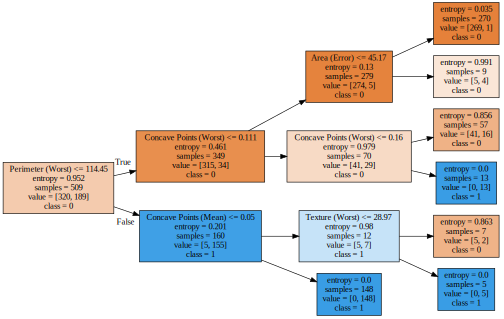

In [31]:
from sklearn import tree

# Instanting model
model = DecisionTreeClassifier(random_state=None, 
                               max_depth=3,
                               criterion='entropy')

# 10-fold cross-validation
scores = cross_validate(model, X, y, cv=10, return_estimator=True)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

# Getting the trained model from the 1st fold
model = scores['estimator'][0]

features = X
class_labels = y

# Visualising the tree
visualise_tree(model, features, class_labels)